# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [2]:
import numpy as np
X=[2,4,-6]
p=2
norma2 = np.linalg.norm(X,p)
norma2

7.483314773547883

In [3]:
import numpy as np
X=[2,4,-6]
p=1
norma1 = np.linalg.norm(X,p)
norma1

12.0

In [4]:
import numpy as np
X=[2,4,-6]
p=15
norma15 = np.linalg.norm(X,p)
norma15

6.000912519067473

In [5]:
# Caso especial p=0
import numpy as np
X=[2,4,-6]
p=0
norma0 = np.linalg.norm(X,p)
norma0

3.0

In [6]:
# Caso especial p grande -> "tendiendo a infinito"
import numpy as np
X=[2,4,-6]
p=100
norma100 = np.linalg.norm(X,p)
norma100

# Se aprecia en contraste con norma15 que tiende a 6 al tender p a infinito

6.0

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [7]:
truth = np.array(     [1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [8]:
import numpy as np

In [9]:
true_positive = np.sum(truth & prediction)
true_positive

3

In [10]:
true_negative = np.sum((1-truth) & (1-prediction))
true_negative

1

In [11]:
false_positive = np.sum((1-truth)&prediction)
false_positive

3

In [12]:
false_negative = np.sum(truth & (1-prediction))
false_negative

3

In [13]:
# Métrica Presición = TP/(TP+FP)
Presicion = true_positive/(true_positive + false_positive)
Presicion

0.5

In [14]:
# Métrica Recall = TP/(TP+FN)
Recall = true_positive/(true_positive + false_negative)
Recall

0.5

In [15]:
# Métrica Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
Accuracy

0.4

### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [18]:
#Ejercicio 3 - HAR

import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
PATH_DATASET = "./data_ej3y4/HAR_Dataset/train"

In [20]:
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

In [21]:
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [22]:
df = pd.DataFrame(data=X_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [23]:
clases = np.unique(y_train)
n_clases = clases.size
n_clases

6

In [24]:
# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Ejercicio 3 punto 1 - Aplicación de PCA
pca = PCA(n_components=0.8).fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Cantidad de componentes necesarios
print("Cantidad de componentes necesarios para explicar el 80% de la varianza:", X_pca.shape[1])


Cantidad de componentes necesarios para explicar el 80% de la varianza: 26


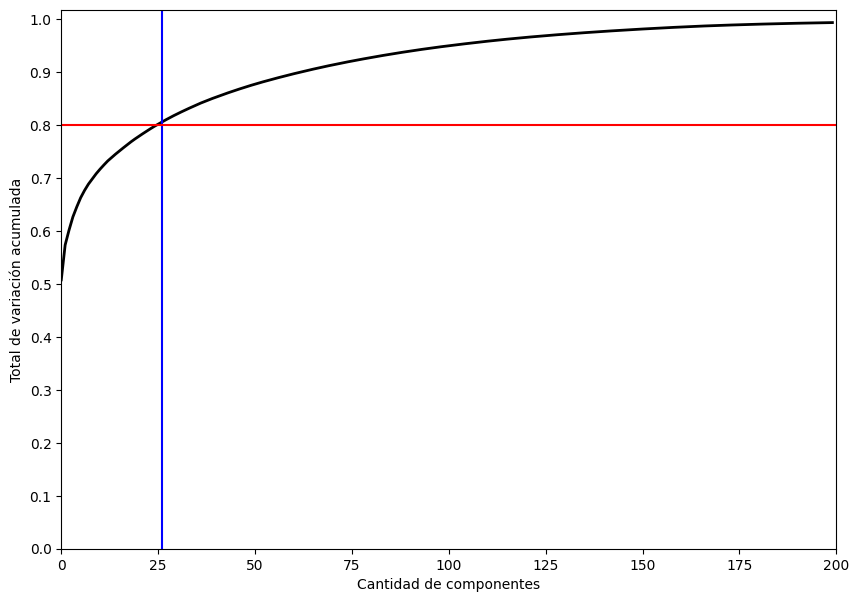

In [25]:
# Ejercicio 3 punto 2
pca_2 = PCA(n_components=200).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total de variación acumulada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(X_pca.shape[1], c='b')
plt.axhline(0.8, c='r')
plt.show()

In [26]:
# Ejercicio 3 parte 3 - k=6
# Cantidad de clusters: 6
kmeans = KMeans(n_clusters=6, n_init=100)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_



In [27]:
# Ejercicio 3 parte 3b - k=2
# Cantidad de clusters: 2
kmeans_move = KMeans(n_clusters=2, n_init=100)
kmeans_move.fit(X_pca)
cluster_labels_mov = kmeans_move.labels_



C:\Users\Facu\AppData\Local\Temp\ipykernel_8168\331278465.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


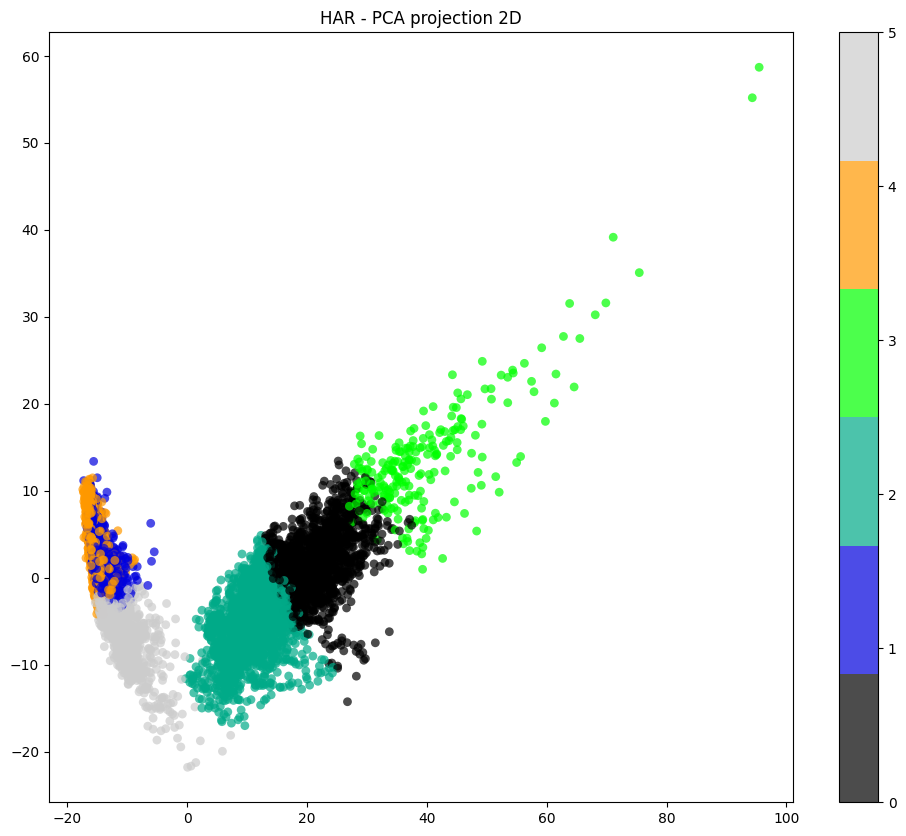

In [28]:
# Ejercicio 3 parte 4 - k=6
# Gráfico utilizando las primeras dos componentes principales como ejes X e Y
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D')


C:\Users\Facu\AppData\Local\Temp\ipykernel_8168\2022778534.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


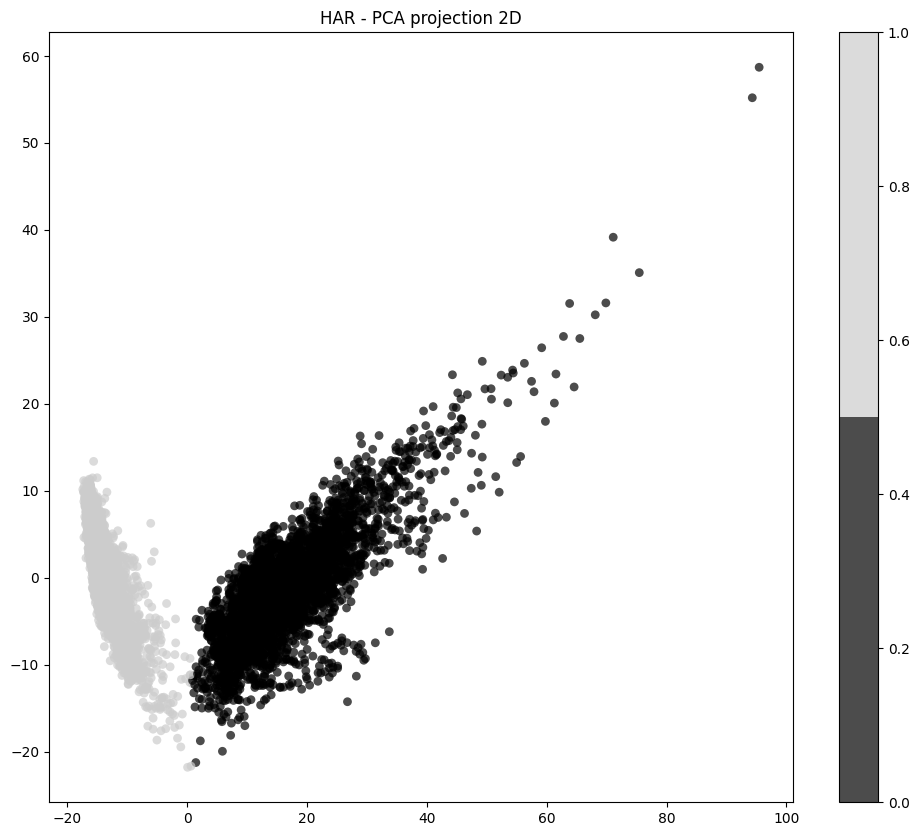

In [29]:
# Ejercicio 3 parte 4b - k=2
# Gráfico utilizando las primeras dos componentes principales como ejes X e Y
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D')

Ejercicio 3 y 4 parte 5:

La ventaja de la utilización de PCA en conjunto con k-means es que al implementar PCA se reduce la dimensionalidad a tratar del dataset. Esto reduce la cantidad de cálculo requerido por k-means para la clousterización.
La utilización de PCA con 26 componentes(para este caso en particular), reduce notoriamente la cantidad de calculo requerido, manteniendo una varianza explicada en el orden del 80%, obviando las dimensiones que no aporten información significativa al proceso de lausterización.

In [30]:
# EJERCICIO 4
# Importación de la base de datos de MNIST
import tensorflow as tf

(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train_mnist.shape == (60000, 28, 28)
assert X_test_mnist.shape == (10000, 28, 28)
assert Y_train_mnist.shape == (60000,)
assert Y_test_mnist.shape == (10000,)


X_train_mnist = X_train_mnist.reshape((60000, 28*28))
X_test_mnist = X_test_mnist.reshape((10000, 28*28))

4422102/4422102 [==============================] - 0s 0us/step


In [31]:
# Estandarización
scaler_mnist = StandardScaler()
X_scaled_mnist = scaler.fit_transform(X_train_mnist)

# Ejercicio 3 punto 1 - Aplicación de PCA
pca_mnist = PCA(n_components=0.8).fit(X_scaled_mnist)
X_pca_mnist = pca_mnist.transform(X_scaled_mnist)

# Cantidad de componentes necesarios
print("Cantidad de componentes necesarios para explicar el 80% de la varianza:", X_pca_mnist.shape[1])

Cantidad de componentes necesarios para explicar el 80% de la varianza: 50


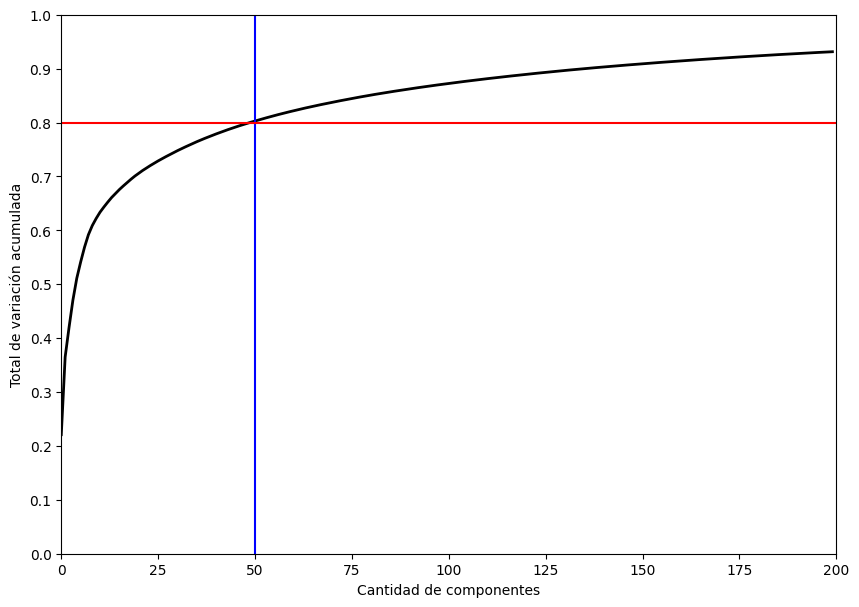

In [32]:
# Ejercicio 4 punto 2
pca_2_mnist = PCA(n_components=200).fit(X_scaled_mnist)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2_mnist.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total de variación acumulada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(X_pca_mnist.shape[1], c='b')
plt.axhline(0.8, c='r')
plt.show()

In [33]:
# Ejercicio 4 parte 3 - k=10
# Cantidad de clusters: 10
kmeans_mnist = KMeans(n_clusters=10, n_init=50)
kmeans_mnist.fit(X_pca_mnist)
cluster_labels_mnist = kmeans_mnist.labels_

In [34]:
# Ejercicio 4 parte 3 - k=2
# Cantidad de clusters: 2
kmeans_move_mnist = KMeans(n_clusters=2, n_init=50)
kmeans_move_mnist.fit(X_pca_mnist)
cluster_labels_mnist_mov = kmeans_move_mnist.labels_

C:\Users\Facu\AppData\Local\Temp\ipykernel_8168\551485279.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=cluster_labels_mnist, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


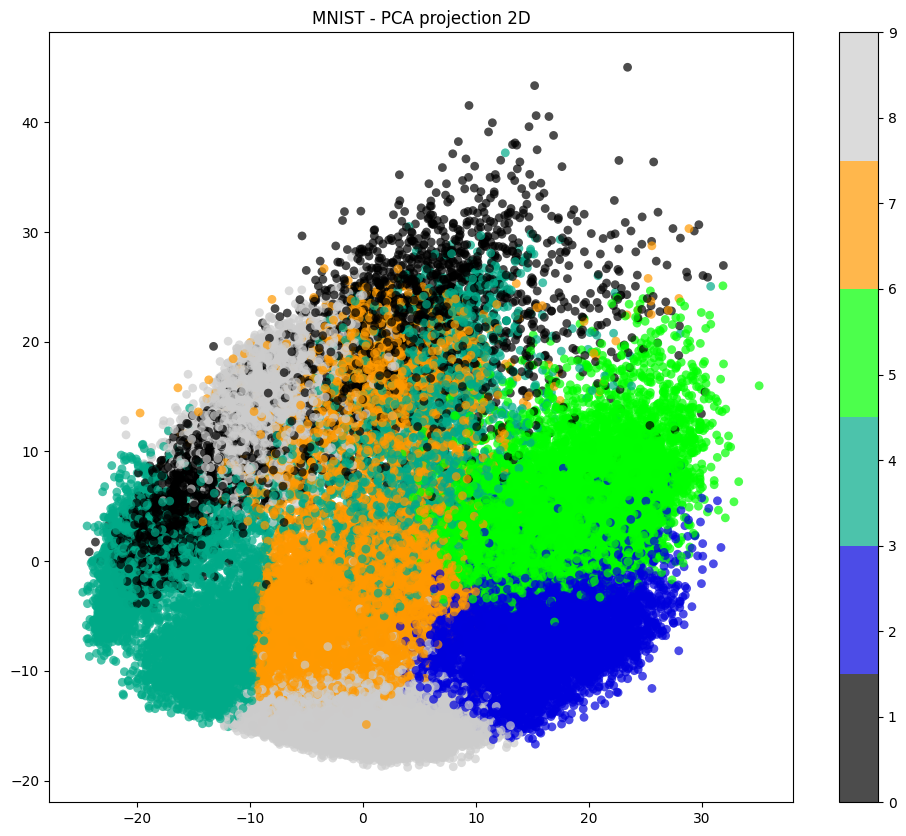

In [35]:
# Ejercicio 4 parte 4 - k=10
# Gráfico utilizando las primeras dos componentes principales como ejes X e Y
plt.figure(figsize=(12,10))
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=cluster_labels_mnist, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - PCA projection 2D')

C:\Users\Facu\AppData\Local\Temp\ipykernel_8168\3958396505.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=cluster_labels_mnist_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


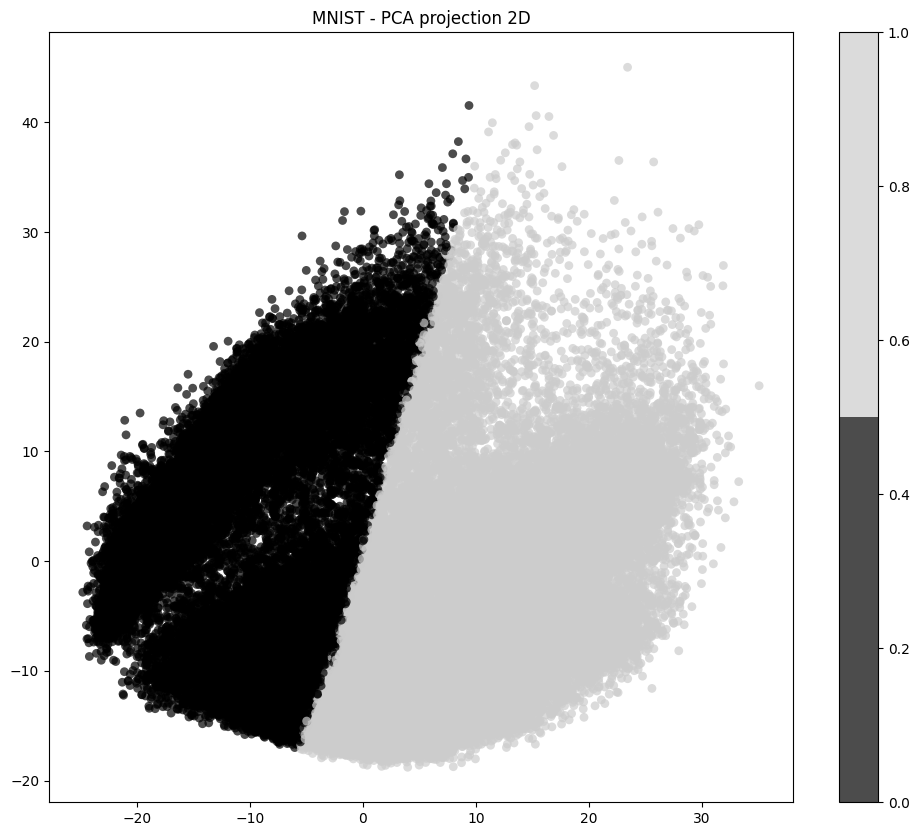

In [36]:
# Ejercicio 4 parte 4b - k=2
# Gráfico utilizando las primeras dos componentes principales como ejes X e Y
plt.figure(figsize=(12,10))
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=cluster_labels_mnist_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - PCA projection 2D')

Ejercicio 3 y 4 parte 5:

La ventaja de la utilización de PCA en conjunto con k-means es que al implementar PCA se reduce la dimensionalidad a tratar del dataset. Esto reduce la cantidad de cálculo requerido por k-means para la clousterización.
La utilización de PCA con 26 componentes(para este caso en particular), reduce notoriamente la cantidad de calculo requerido, manteniendo una varianza explicada en el orden del 80%, obviando las dimensiones que no aporten información significativa al proceso de lausterización.

## Segunda Parte (Clase 3 y 4)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [38]:
import numpy as np

# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [39]:
import pandas as pd

df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


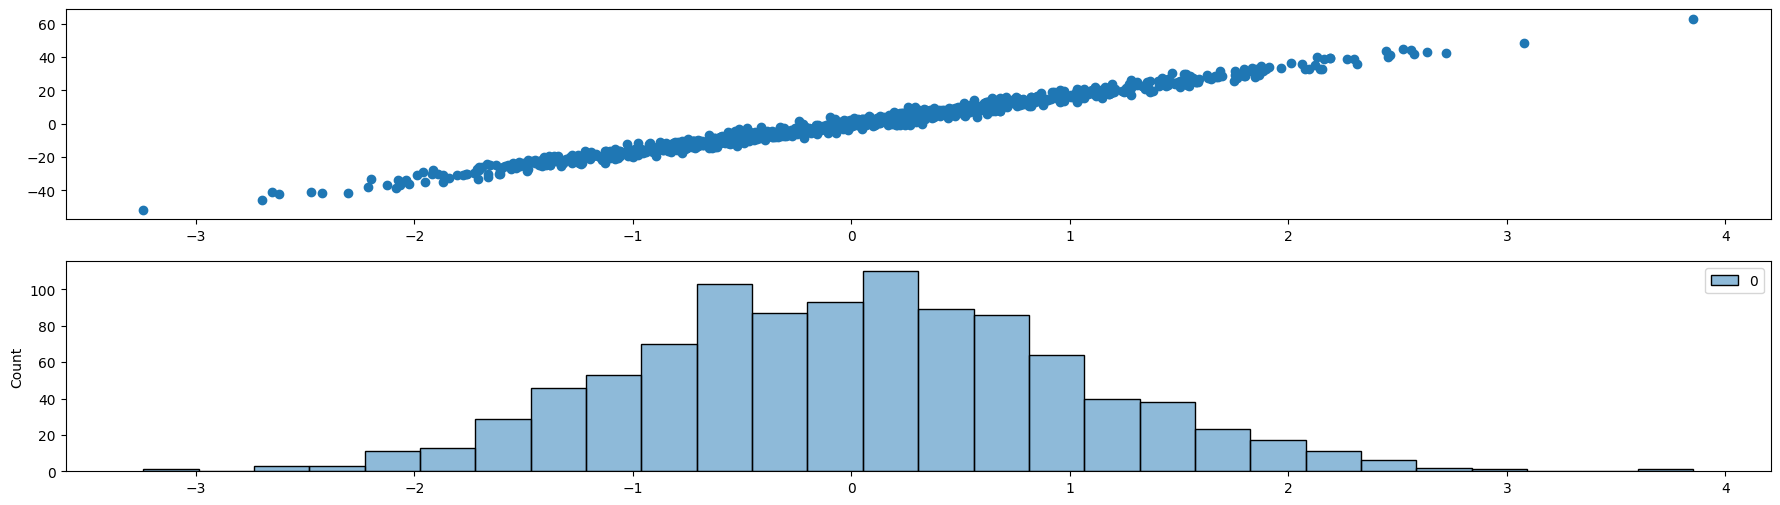

In [40]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [41]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [42]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)
df_outlier

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314
...,...,...
995,-1.918771,-30.210145
996,0.482472,9.182647
997,0.241962,4.855134
998,1.366874,25.785771


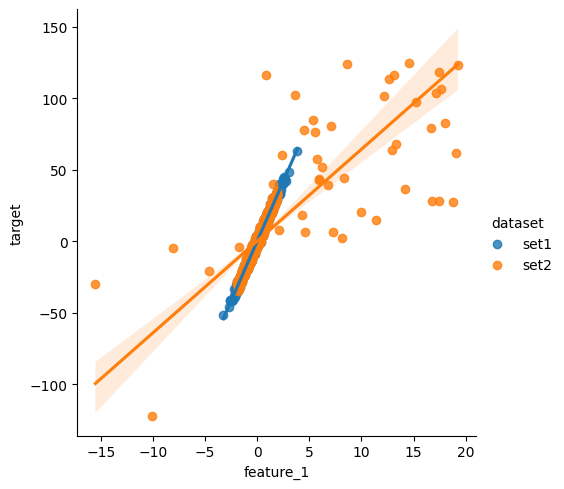

In [43]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [44]:
import numpy as np

In [45]:
df

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314
...,...,...
995,-1.918771,-30.210145
996,0.482472,9.182647
997,0.241962,4.855134
998,1.366874,25.785771


In [47]:
# df tiene columna "target" = Y

def split(df: pd.DataFrame, train_porcent: float, validation_porcent: float):  # train: 0.7 ; validation: 0.2 ; test: 0.1
    # permutación de elementos
    permuted_df_ = np.random.permutation(df.index)
    permuted_idxs = df.iloc[permuted_df_].reset_index(drop = True)

    # N_filas
    length = df.shape[0]

    # definición de columna Y
    Y_label = "target"

    # definiciones de asignaciones porcentuales
    percentage_train = train_porcent
    percentage_validation = validation_porcent

    # <<[0:limit_train]
    permuted_train_idxs = df.iloc[0:int(percentage_train*df.shape[0])]

    # <<[limit_train:limit_validation]
    permuted_validation_idxs = df.iloc[int(percentage_train*df.shape[0]):int( (percentage_train + percentage_validation)*df.shape[0])]

    # <<[limit_validation:end]
    permuted_test_idxs = df.iloc[int( (percentage_train + percentage_validation)*df.shape[0]):df.shape[0]]

    X_train = permuted_train_idxs.drop(Y_label, axis = 1)
    X_val   = permuted_validation_idxs.drop(Y_label, axis = 1)
    X_test  = permuted_test_idxs.drop(Y_label, axis = 1)
    Y_train = permuted_train_idxs[Y_label]
    Y_val   = permuted_validation_idxs[Y_label]
    Y_test  = permuted_test_idxs[Y_label]
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [48]:
df_X_train, df_X_val, df_X_test, df_Y_train, df_Y_val, df_Y_test = split(df, 0.7, 0.2)


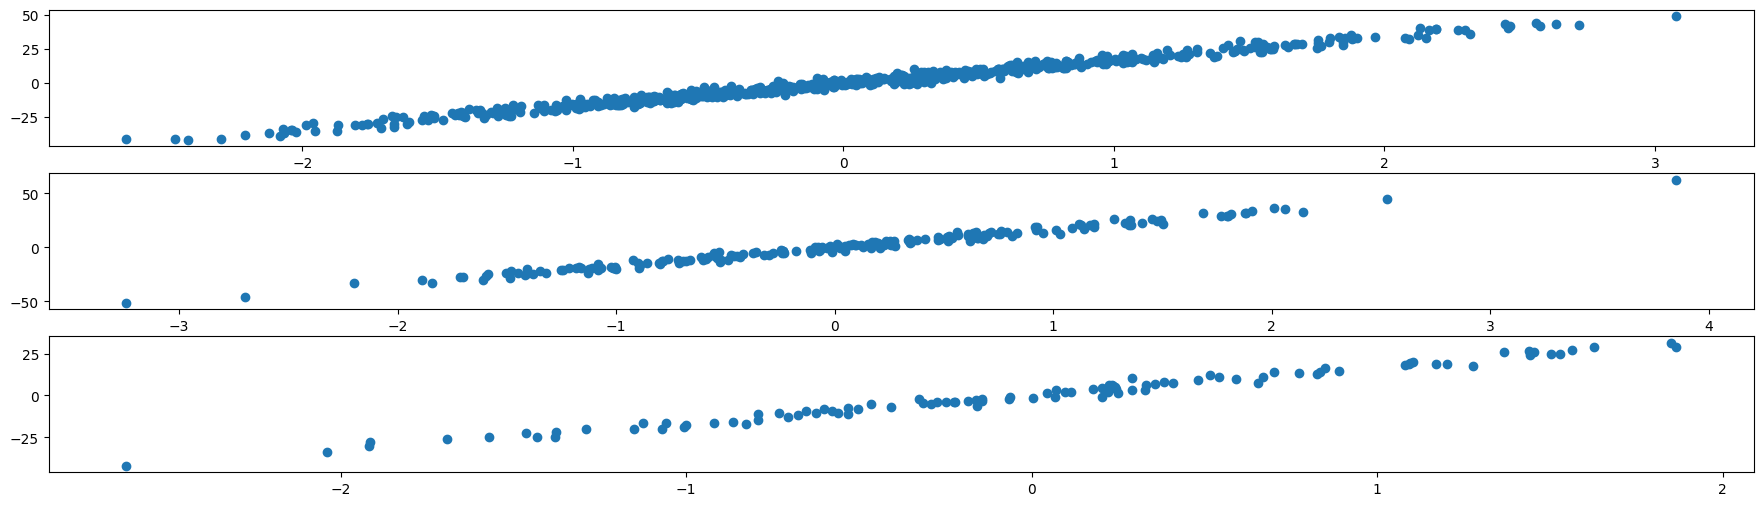

In [49]:
fig,axes = plt.subplots(3,figsize=(22,6))
axes[0].scatter(df_X_train,df_Y_train)
axes[1].scatter(df_X_val,df_Y_val)
axes[2].scatter(df_X_test,df_Y_test)

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

In [51]:
import numpy as np
import pandas as pd

In [88]:
# Creao un dataset de prueba
X_ej6, y_ej6 = make_regression(n_samples = 1000,
                                n_features = 1,
                                noise = 1,
                                n_informative = 1,
                                random_state = 42)

new_data_ej6 = np.append(X_ej6,y_ej6.reshape(-1,1),axis=1)

df_ej6 = pd.DataFrame(new_data_ej6)

new_col = []
i = 0
for col in df_ej6.columns:
    if i ==  len(df_ej6.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df_ej6.columns = new_col

df_ej6.head()

,feature_1,target
0,-1.758739,-29.787279
1,1.031845,15.903898
2,-0.487606,-9.142930
3,0.186454,2.411486
4,0.725767,12.250321


In [73]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

Generación de Outliers

In [89]:
df_ej6_outlier = generate_outliers(df_ej6,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)
df_ej6_outlier

,feature_1,target
0,-1.758739,-29.787279
1,1.031845,15.903898
2,-0.487606,-9.142930
3,0.186454,2.411486
4,0.725767,12.250321
...,...,...
995,-1.918771,-31.173110
996,0.482472,8.631610
997,0.241962,4.453790
998,1.366874,24.339267


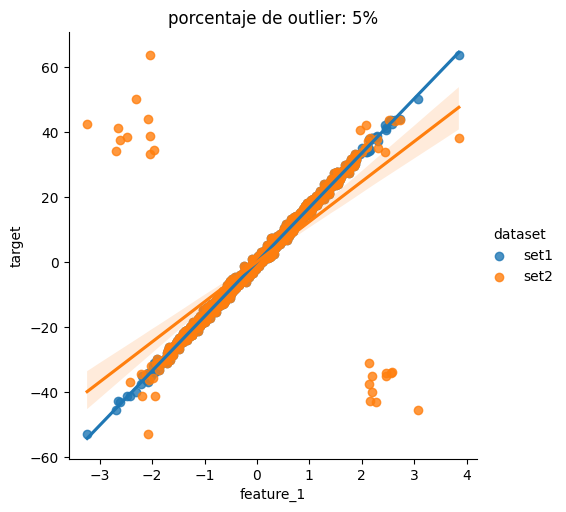

In [102]:
sns.lmplot(data = pd.concat([df_ej6.assign(dataset = 'set1'),
                                 df_ej6_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset').set(title=f"porcentaje de outlier: 5%")

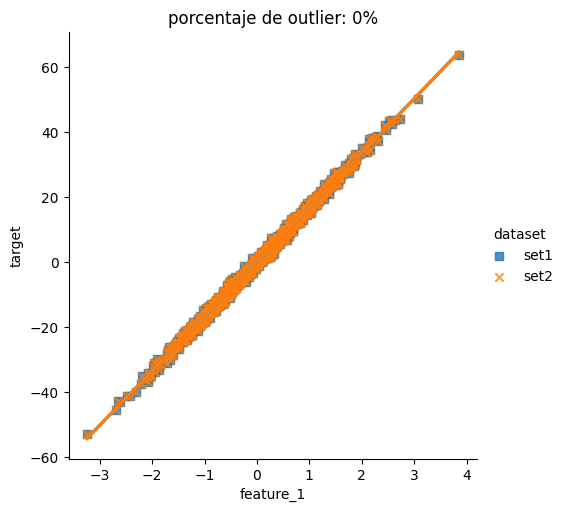

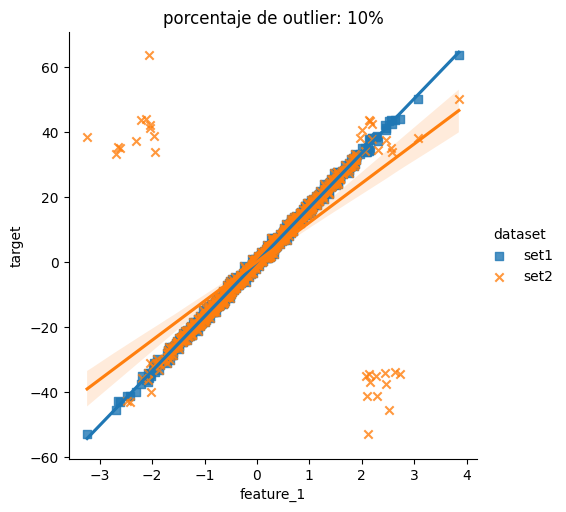

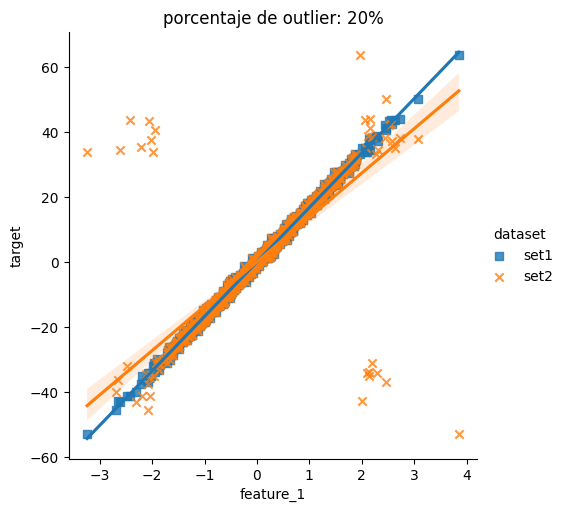

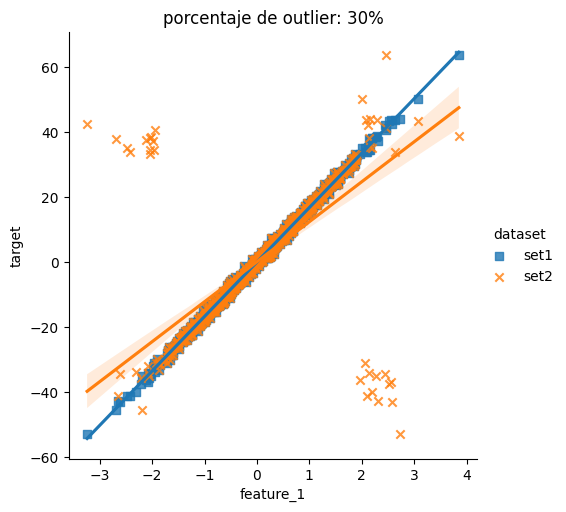

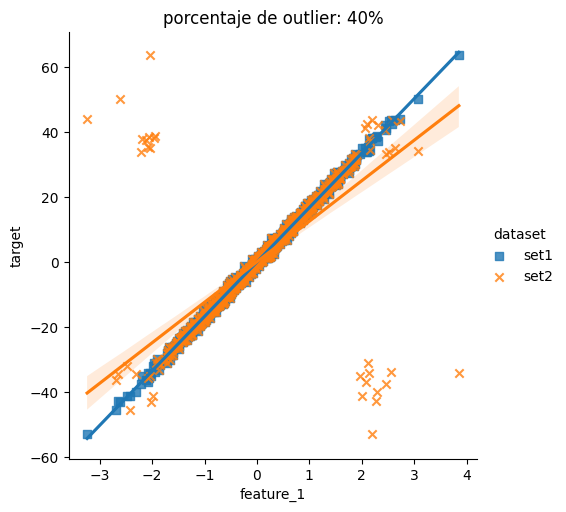

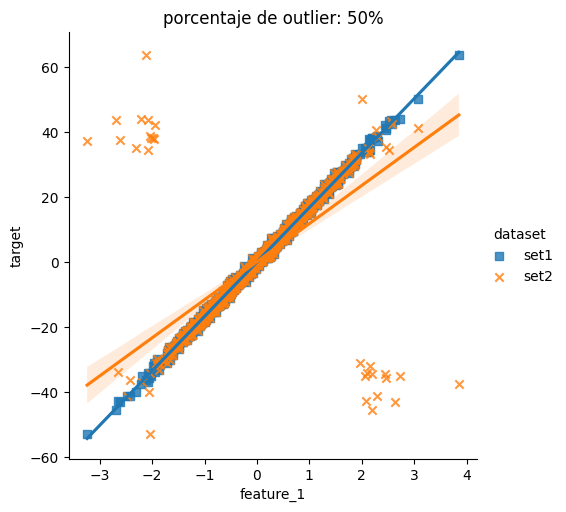

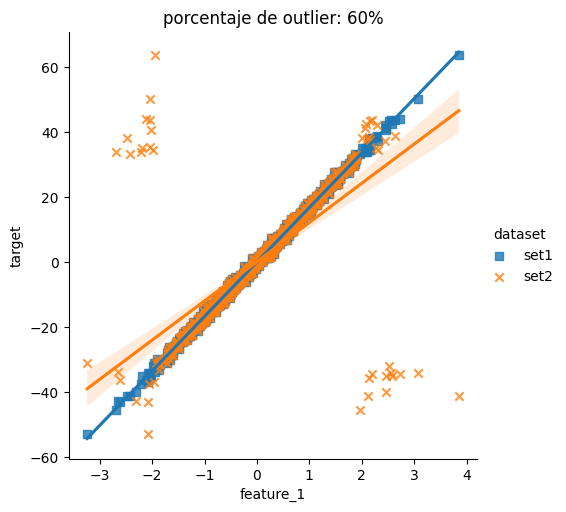

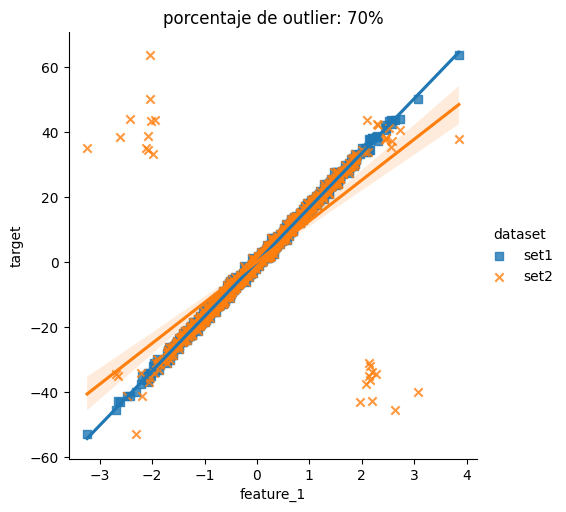

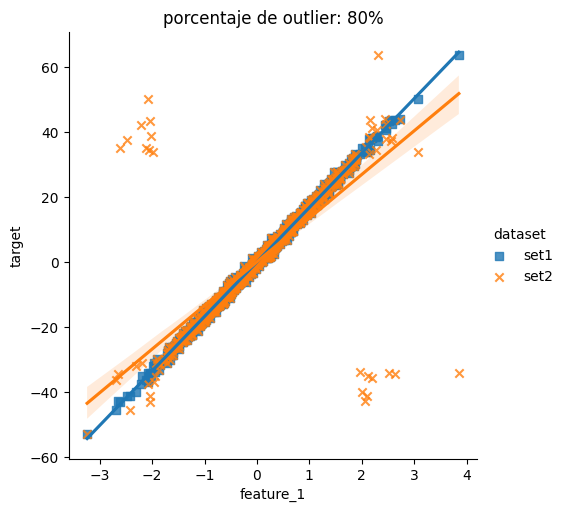

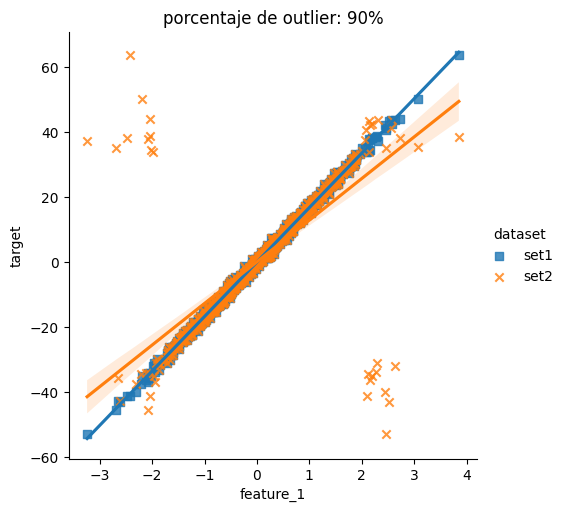

In [101]:
for i in range(0,100,10):
    df_ej6_outlier_i = generate_outliers(df_ej6,['feature_1'], percentage = i/100, extreme_outlier = False, two_tailed= True)
    sns.lmplot(data = pd.concat([df_ej6.assign(dataset = 'set1'),
                                 df_ej6_outlier_i.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target', markers = ["s", "x"],
                hue = 'dataset').set(title=f"porcentaje de outlier: {i}%")
    

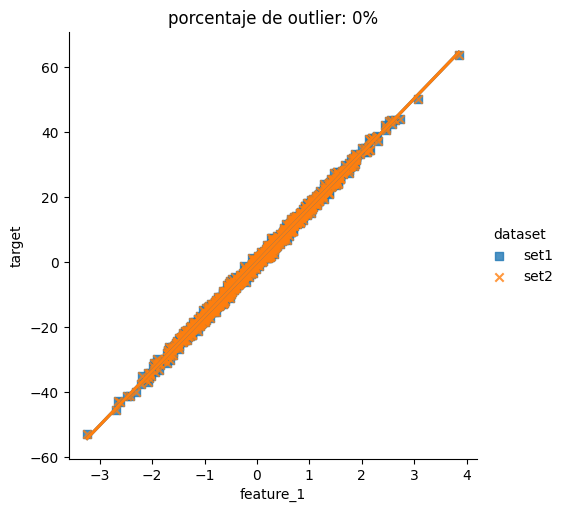

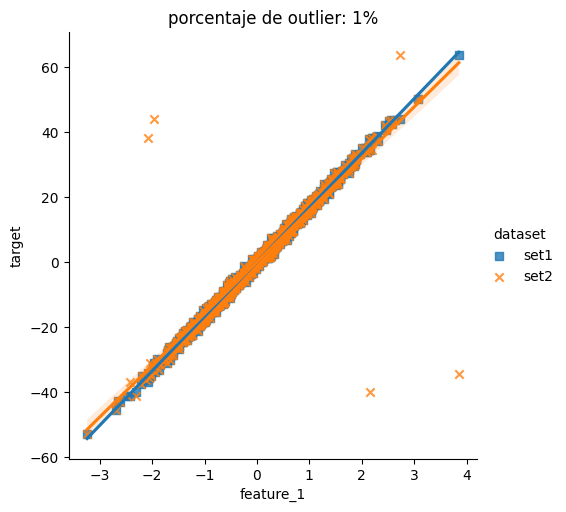

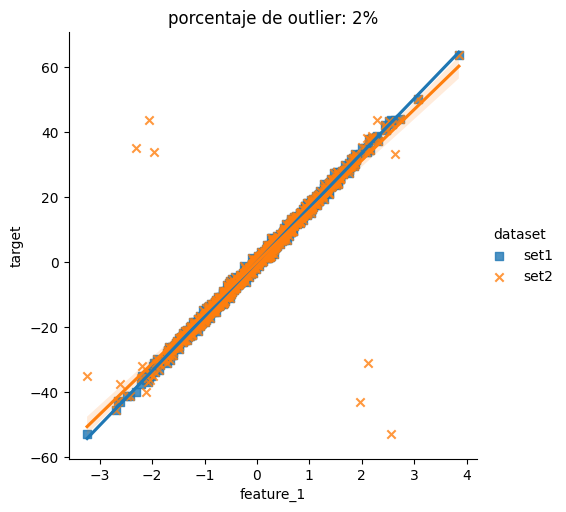

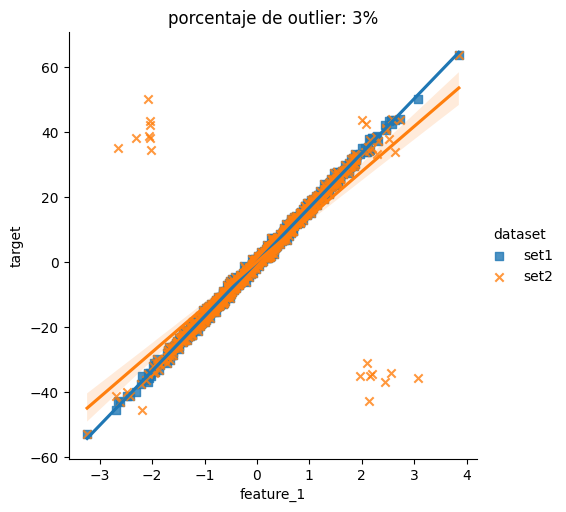

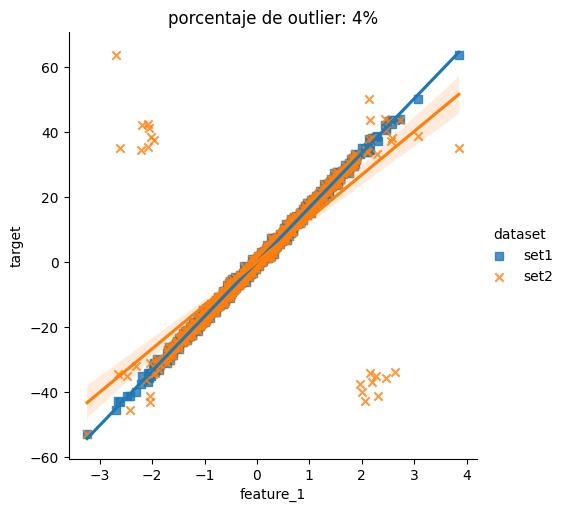

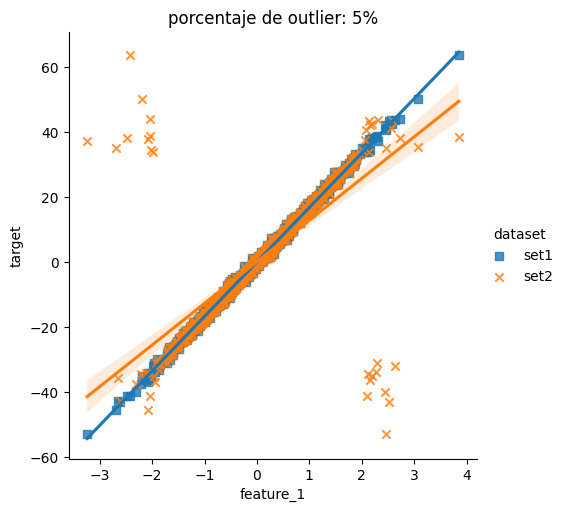

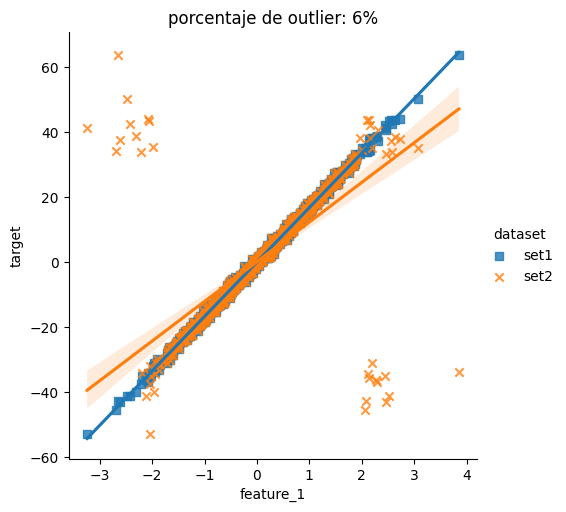

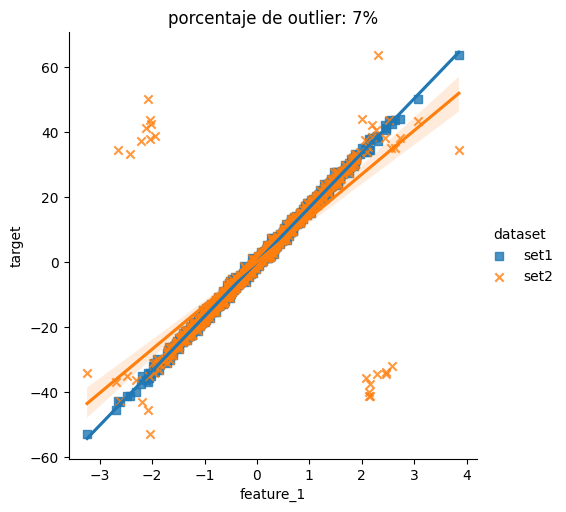

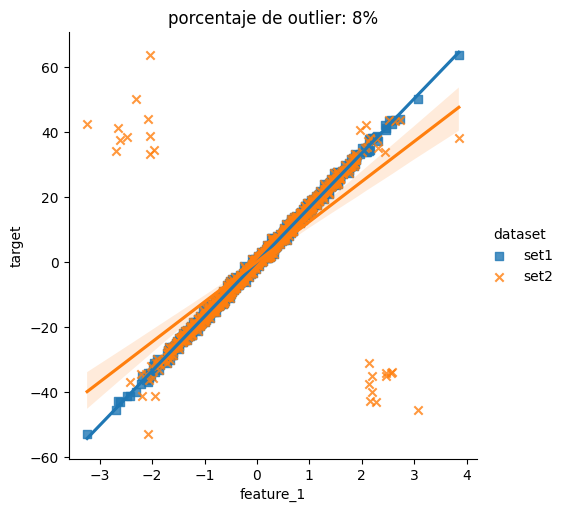

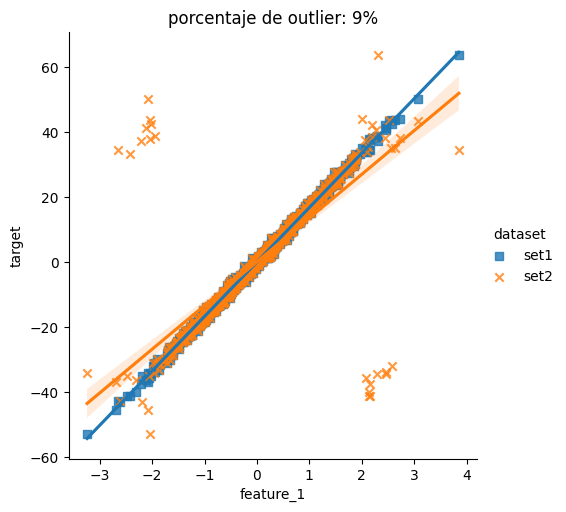

In [103]:
# Se aprecia mayor cambio en la pendiente en los primeros valores de porcentajes
for i in range(0,10,1):
    df_ej6_outlier_i = generate_outliers(df_ej6,['feature_1'], percentage = i/100, extreme_outlier = False, two_tailed= True)
    sns.lmplot(data = pd.concat([df_ej6.assign(dataset = 'set1'),
                                 df_ej6_outlier_i.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target', markers = ["s", "x"],
                hue = 'dataset').set(title=f"porcentaje de outlier: {i}%")

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`